# Machine Learning and Statisitics 2020

## Project 2020

### Student ID: Claire Nolan G00376464

# Background Information

The aim of this project is to use a dataset (powerproduction.csv) to create a model which makes predictions about the wind turbine power output (y) based in the wind speed input (x).

A wind turbine produces electricity by using the kinetic or moving energy of wind to create motion. The amount of electricity that a single turbine is able to produce depends on its size, the wind speed and the efficiency with which that specifically designed turbine is able to convert wind energy to electrical energy. The wind turbine will start operating at wind speeds of four to five metres per second. At speeds of 15 metres per second, the wind turbine will reach its maximum output. If the wind speeds reach 25 metres per second or greater, the turbine will be shut down to avoid damage to the turbine occurring. Therefore Wind energy is not a particularly reliable source of energy.

![https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.energy.gov%2Fsites%2Fprod%2Ffiles%2Fstyles%2Fborealis_photo_gallery_large_respondmedium%2Fpublic%2F2017%2F06%2Ff34%2Fwind_graphic.jpg%3Fitok%3DhwAc2zRU&imgrefurl=https%3A%2F%2Fwww.energy.gov%2Feere%2Farticles%2Fhow-do-wind-turbines-survive-severe-storms&tbnid=8YmI_ecoW43E0M&vet=12ahUKEwibi4jqy4DuAhUeZhUIHeDoA5wQMygAegUIARCiAQ..i&docid=iYnKIcxc0OBeFM&w=525&h=276&q=wind%20turbine%20speed&ved=2ahUKEwibi4jqy4DuAhUeZhUIHeDoA5wQMygAegUIARCiAQ](attachment:image.png)


https://en.wikipedia.org/wiki/Wind_turbine
https://enerpower.ie/portfolio/wind-turbine-faq-ireland/
https://www.bordnamona.ie/company/our-businesses/powergen/frequently-asked-questions/
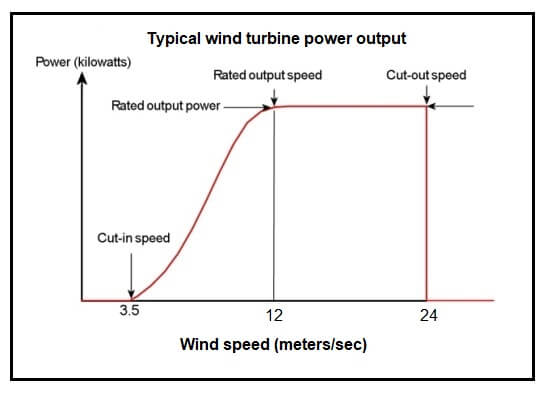

<br>

## 1. Import required libraries
***

Keras
Panda

Pandas
Pandas is used for data manipulation, analysis and cleaning. It is used for different kinds of data, such as Tabular data, ordered and unordered time series data, matrix data with row & column labels and any other statistical data sets.

Numpy
Numpy creates random data. It is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.

Matplotlib
The Matplotlib program allows for the creation of plots of data. It is the plotting library for the Python programming language. It creates 2D and 3D plots for data analysis.

Seaborn
The Seaborn program allows for the visualisation of data. It provides high-level commands to create a variety of plot types useful for statistical data exploration and statistical model fitting.

In [7]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

import seaborn as sns

In [8]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<br>

## 2. Simple Investigation of the dataset
***

In [9]:
# Import the dataset

df = pd.read_csv("C:\Users\Claire Laptop\Desktop\MLSProject2020\MLS_Project2020\powerproduction.csv") 


df #displays the data set as a table/array

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-9-6f75449f0934>, line 3)

In [10]:
sns.pairplot(df) # data is displayed as histogram and scatterplots

NameError: name 'df' is not defined